IMPORTING MODULES

In [11]:
import os
import glob
import librosa
import librosa.display
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, LSTM
from keras.layers import TimeDistributed 
import tkinter as tk
from tkinter import filedialog
from pydub import AudioSegment
import sounddevice as sd
from PIL import Image, ImageTk 

Feature Extraction and Dataset Preparation

In [12]:
def extract_features(file_path):
    audio, sr = librosa.load(file_path, res_type='kaiser_fast')
    features = np.mean(librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13).T, axis=0)
    return features

data = []
labels = []
for folder_name in os.listdir(r'TESS Toronto emotional speech set data'):
    folder_path = os.path.join(r'TESS Toronto emotional speech set data', folder_name)
    for file_path in glob.glob(os.path.join(folder_path, '*.wav')):
        print(file_path)
        features = extract_features(file_path)
        data.append(features)
        labels.append(folder_name)

TESS Toronto emotional speech set data\OAF_angry\OAF_back_angry.wav
TESS Toronto emotional speech set data\OAF_angry\OAF_bar_angry.wav
TESS Toronto emotional speech set data\OAF_angry\OAF_base_angry.wav
TESS Toronto emotional speech set data\OAF_angry\OAF_bath_angry.wav
TESS Toronto emotional speech set data\OAF_angry\OAF_bean_angry.wav
TESS Toronto emotional speech set data\OAF_angry\OAF_beg_angry.wav
TESS Toronto emotional speech set data\OAF_angry\OAF_bite_angry.wav
TESS Toronto emotional speech set data\OAF_angry\OAF_boat_angry.wav
TESS Toronto emotional speech set data\OAF_angry\OAF_bone_angry.wav
TESS Toronto emotional speech set data\OAF_angry\OAF_book_angry.wav
TESS Toronto emotional speech set data\OAF_angry\OAF_bought_angry.wav
TESS Toronto emotional speech set data\OAF_angry\OAF_burn_angry.wav
TESS Toronto emotional speech set data\OAF_angry\OAF_cab_angry.wav
TESS Toronto emotional speech set data\OAF_angry\OAF_calm_angry.wav
TESS Toronto emotional speech set data\OAF_angry\

In [13]:
len(data)

2800

In [14]:
import pandas as pd

df_tess = pd.DataFrame({'labels': labels})
print("Label distribution:")
print(df_tess['labels'].value_counts())

print("Total samples:", df_tess.shape[0])


Label distribution:
labels
OAF_angry                 200
OAF_disgust               200
OAF_Fear                  200
OAF_happy                 200
OAF_neutral               200
OAF_Pleasant_surprise     200
OAF_Sad                   200
YAF_angry                 200
YAF_disgust               200
YAF_fear                  200
YAF_happy                 200
YAF_neutral               200
YAF_pleasant_surprised    200
YAF_sad                   200
Name: count, dtype: int64
Total samples: 2800


Data Visualization

FOR EMOTION ANGRY


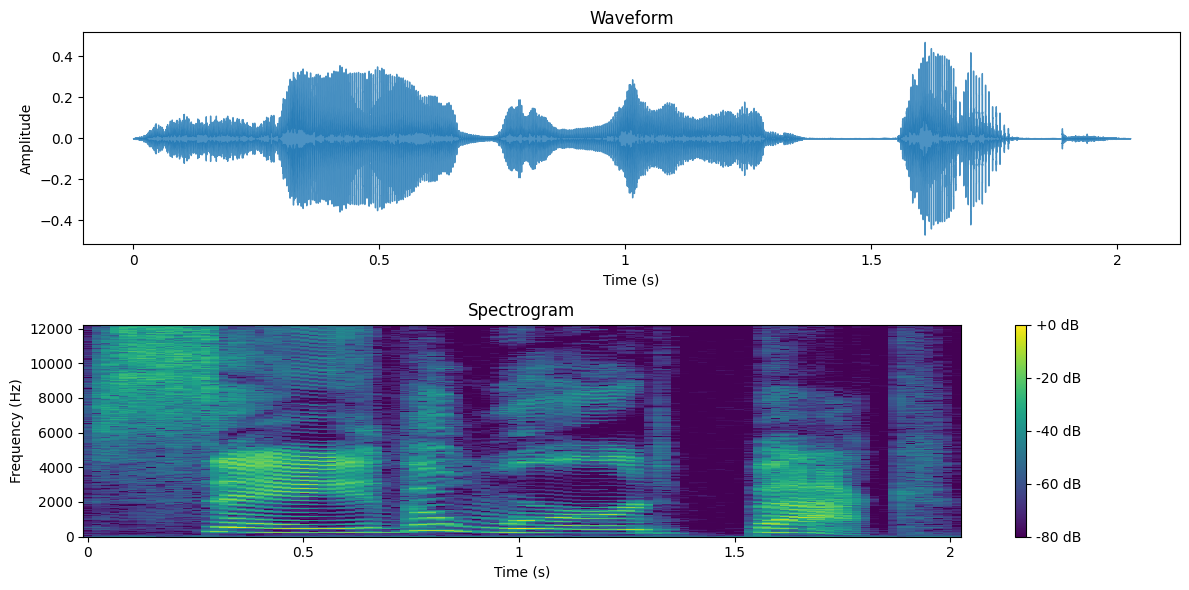

FOR EMOTION HAPPY


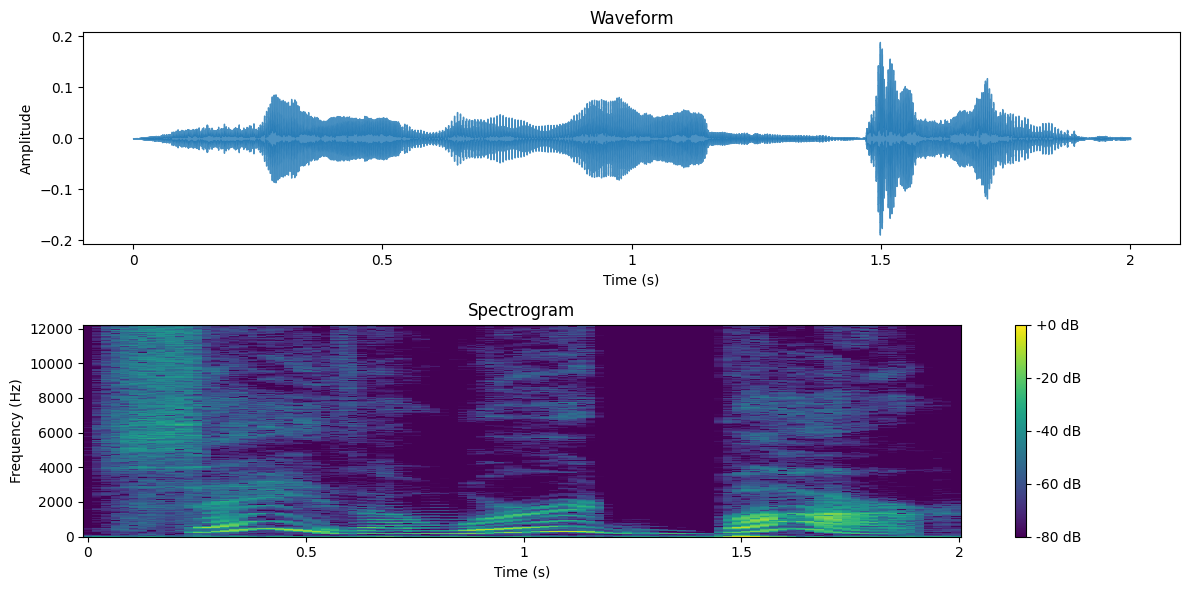

In [20]:

import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Audio, display
def plot_waveform_and_spectrogram(audio_path):
    y, sr = librosa.load(audio_path, sr=None)
    plt.figure(figsize=(12, 6))
    
    plt.subplot(2, 1, 1)
    librosa.display.waveshow(y, sr=sr, alpha=0.8)
    plt.title('Waveform')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    
    
    plt.subplot(2, 1, 2)
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
    librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='hz', cmap='viridis')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Spectrogram')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    
    plt.tight_layout()
    plt.show()
def play_audio(audio_path):
    display(Audio(audio_path, autoplay=True))

audio_path = r'D:\speech emotion recongnition\Speech_Emotion_Recognition_Tess-main\TESS Toronto emotional speech set data\YAF_angry\YAF_back_angry.wav'
print("FOR EMOTION ANGRY")
play_audio(audio_path)
plot_waveform_and_spectrogram(audio_path)

audio_path =r'D:\speech emotion recongnition\Speech_Emotion_Recognition_Tess-main\TESS Toronto emotional speech set data\OAF_happy\OAF_bar_happy.wav'
print("FOR EMOTION HAPPY")
play_audio(audio_path)
plot_waveform_and_spectrogram(audio_path)






Model Building, Training, and Evaluation

In [17]:
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)
X_train, X_test, y_train, y_test = train_test_split(data, labels_encoded, test_size=0.2, random_state=42)

X_train = np.array(X_train)[:, np.newaxis, :]
X_test = np.array(X_test)[:, np.newaxis, :]

model = Sequential()
model.add(TimeDistributed(Dense(512, activation='relu'), input_shape=(1, X_train.shape[2])))
model.add(Dropout(0.5))
model.add(LSTM(256))
model.add(Dropout(0.5))
model.add(Dense(len(label_encoder.classes_), activation='sigmoid'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test))

loss, accuracy = model.evaluate(X_test, y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Epoch 1/100


c:\Users\Anand B Patil\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.0671 - loss: 2.8352 - val_accuracy: 0.0732 - val_loss: 2.5898
Epoch 2/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.0688 - loss: 2.7394 - val_accuracy: 0.0571 - val_loss: 2.5774
Epoch 3/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.0829 - loss: 2.6682 - val_accuracy: 0.2464 - val_loss: 2.5072
Epoch 4/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.1036 - loss: 2.6039 - val_accuracy: 0.1446 - val_loss: 2.4641
Epoch 5/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.1342 - loss: 2.5410 - val_accuracy: 0.2500 - val_loss: 2.2898
Epoch 6/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.1794 - loss: 2.3877 - val_accuracy: 0.2643 - val_loss: 2.1464
Epoch 7/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.2097 - loss: 2.2403 - val_accuracy: 0.3875 - val_loss: 1.9707
Epoch 8/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.2466 - loss: 2.1006 - val_accuracy: 0.4518 - val_l

MODEL ACCURACY GRAPH

Epoch 1/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9292 - loss: 0.1911 - val_accuracy: 0.9393 - val_loss: 0.1823
Epoch 2/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9401 - loss: 0.1575 - val_accuracy: 0.9339 - val_loss: 0.1803
Epoch 3/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9371 - loss: 0.1618 - val_accuracy: 0.9411 - val_loss: 0.1626
Epoch 4/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9289 - loss: 0.1841 - val_accuracy: 0.9339 - val_loss: 0.1819
Epoch 5/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9166 - loss: 0.2032 - val_accuracy: 0.9375 - val_loss: 0.1914
Epoch 6/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9157 - loss: 0.1976 - val_accuracy: 0.9429 - val_loss: 0.1785
Epoch 7/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9372 - loss: 0.1761 - val_accuracy: 0.9429 - val_loss: 0.1642
Epoch 8/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9290 - loss: 0.1803 - val_accuracy: 0.

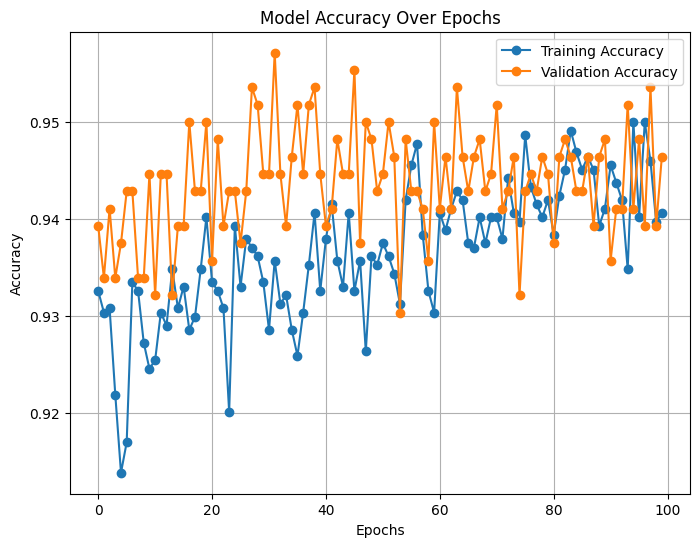

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9266 - loss: 0.2080
Test loss: 0.16376574337482452
Test accuracy: 0.9464285969734192


In [ ]:
import matplotlib.pyplot as plt


history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=64,
    validation_data=(X_test, y_test)
)


plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


loss, accuracy = model.evaluate(X_test, y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)


CONFUSION MATRIX

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


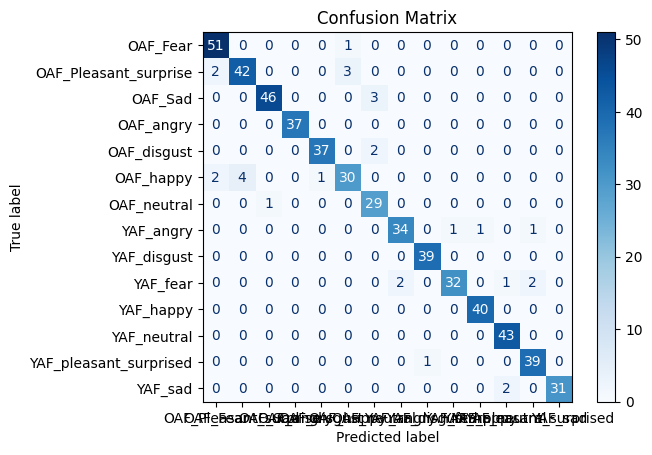

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt


y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  


conf_matrix = confusion_matrix(y_test, y_pred_classes)


disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()



Emotion Prediction Function

In [18]:
def predict_emotion(audio_file):
    features = extract_features(audio_file)
    features = features[np.newaxis, np.newaxis, :]  
    print("Features shape:", features.shape)
    print("Features:", features)

    predicted_probabilities = model.predict(features)
    print("Predicted probabilities shape:", predicted_probabilities.shape)
    print("Predicted probabilities:", predicted_probabilities)

    predicted_label_index = np.argmax(predicted_probabilities)
    print("Predicted label index:", predicted_label_index)

    predicted_emotion = label_encoder.classes_[predicted_label_index]
    print("Predicted emotion:", predicted_emotion)


    
    emotion_mapping = {
        'YAF_angry': 'ANGRY',
        'YAF_disgust': 'DISGUST',
        'YAF_fear': 'FEAR',
        'YAF_happy': 'HAPPY',
        'YAF_neutral': 'NEUTRAL',
        'YAF_pleasant_surprised': 'SURPRISED',
        'YAF_sad': 'SAD',
        'OAF_angry': 'ANGRY',
        'OAF_disgust': 'DISGUST',
        'OAF_Fear': 'FEAR',
        'OAF_happy': 'HAPPY',
        'OAF_neutral': 'NEUTRAL',
        'OAF_Pleasant_surprised': 'SURPRISED',
        'OAF_Sad': 'SAD',
    }


    recognizable_emotion = emotion_mapping.get(predicted_emotion)
    return recognizable_emotion

GUI Application

In [25]:
class EmotionApp:
    def __init__(self, root):
        self.root = root
        self.root.title("Emotion Prediction App")
        self.root.configure(bg='yellow')
        
        self.emotion_to_emoji = {
            "HAPPY": r"D:\speech emotion recongnition\Speech_Emotion_Recognition_Tess-main\Emotion Emojis\happy.png",
            "SAD": r"D:\speech emotion recongnition\Speech_Emotion_Recognition_Tess-main\Emotion Emojis\sad.png",
            "ANGRY": r"D:\speech emotion recongnition\Speech_Emotion_Recognition_Tess-main\Emotion Emojis\angry.png",
            "SURPRISED": r"D:\speech emotion recongnition\Speech_Emotion_Recognition_Tess-main\Emotion Emojis\surprised.png",
            "NEUTRAL": r"D:\speech emotion recongnition\Speech_Emotion_Recognition_Tess-main\Emotion Emojis\neutral.png",
            "FEAR": r"D:\speech emotion recongnition\Speech_Emotion_Recognition_Tess-main\Emotion Emojis\fear.png",
            "DISGUST": r"D:\speech emotion recongnition\Speech_Emotion_Recognition_Tess-main\Emotion Emojis\disgust.png"
        }
        
        self.emoji_image = None  
        self.prediction_history = []  
        
        self.show_home_page()
        
    def show_home_page(self):
        self.clear_window()
        
        label = tk.Label(self.root, text="Welcome to Emotion Prediction App", font=('Helvetica bold', 16))
        label.pack(pady=20)
        
        button = tk.Button(self.root, text="Audio Prediction", command=self.show_audio_page, bg='orange')
        button.pack()
        
        button_history = tk.Button(self.root, text="Prediction History", command=self.show_history_page, bg='lightgreen')
        button_history.pack(pady=10)
        
        about_button = tk.Button(self.root, text="About The App", command=self.show_about_page, bg='lightblue')
        about_button.pack(pady=10)
        
    def show_audio_page(self):
        self.clear_window()
        
        canvas = tk.Canvas(self.root, width=500, height=500, bg='skyblue')
        canvas.pack()
        
        label1 = tk.Label(self.root, text='SPEECH EMOTION', font=('Helvetica bold', 26))
        canvas.create_window(250, 50, window=label1)
        
        def upload_audio():
            file_path = filedialog.askopenfilename(filetypes=[("Audio Files", "*.wav")])
            if file_path:
                predicted_emotion = predict_emotion(file_path)
                label2.config(text=predicted_emotion)
                
                self.prediction_history.append((os.path.basename(file_path), predicted_emotion))
                
                emoji_image_path = self.emotion_to_emoji.get(predicted_emotion)
                if emoji_image_path:
                    emoji_image = Image.open(emoji_image_path)
                    emoji_image = emoji_image.resize((100, 100), Image.Resampling.LANCZOS)
                    self.emoji_image = ImageTk.PhotoImage(emoji_image)
                    emoji_label.config(image=self.emoji_image)
                
        button1 = tk.Button(self.root, text='Upload Audio', command=upload_audio, bg='orange')
        canvas.create_window(250, 150, window=button1)
        
        label2 = tk.Label(self.root, text='Predicted Emotion Will Be Displayed Here')
        canvas.create_window(250, 200, window=label2)
        
        emoji_label = tk.Label(self.root, image=None)
        canvas.create_window(250, 300, window=emoji_label)
        
        back_button = tk.Button(self.root, text="Back to Home", command=self.show_home_page)
        canvas.create_window(250, 400, window=back_button)
        
    def show_history_page(self):
        self.clear_window()
        
        canvas = tk.Canvas(self.root, width=500, height=500, bg='lightgreen')
        canvas.pack()
        
        label = tk.Label(self.root, text="Prediction History", font=('Helvetica bold', 16))
        canvas.create_window(250, 50, window=label)
        
        if self.prediction_history:
            for index, (file_name, predicted_emotion) in enumerate(self.prediction_history, start=1):
                history_text = f"{index}. File: {file_name}, Emotion: {predicted_emotion}"
                history_label = tk.Label(self.root, text=history_text)
                canvas.create_window(250, 100 + index * 30, window=history_label)
        else:
            no_history_label = tk.Label(self.root, text="No prediction history available.")
            canvas.create_window(250, 150, window=no_history_label)
        
        back_button = tk.Button(self.root, text="Back to Home", command=self.show_home_page)
        canvas.create_window(250, 450, window=back_button)
        
    def show_about_page(self):
        self.clear_window()
        
        canvas = tk.Canvas(self.root, width=500, height=500, bg='skyblue')
        canvas.pack()
        
        label = tk.Label(self.root, text="About The Software", font=('Helvetica bold', 16))
        canvas.create_window(250, 50, window=label)
        
        about_text = ("Hello Everyone !! "
                      " Speech Emotion Recognition is a software that recognizes the emotion of the user."
                      " All of the audio files in this software should be inputted with '.wav' extension."
                      " A special thanks to the University of Toronto for the TESS data set and to all of my guiders"
                      " at clevered that guided me throughout the journey of making this software.")
        
        about_label = tk.Label(self.root, text=about_text, wraplength=400)
        canvas.create_window(250, 150, window=about_label)
        
        back_button = tk.Button(self.root, text="Back to Home", command=self.show_home_page)
        canvas.create_window(250, 400, window=back_button)
        
    def clear_window(self):
        for widget in self.root.winfo_children():
            widget.destroy()

if __name__ == "__main__":
    root = tk.Tk()
    app = EmotionApp(root)
    root.mainloop()

Features shape: (1, 1, 13)
Features: [[[-304.35767     71.06953    -31.37618     15.670074   -15.375567
    -21.240908   -12.344382   -12.222141   -20.027138    -0.6040487
    -13.610633    -2.638052   -12.59651  ]]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Predicted probabilities shape: (1, 14)
Predicted probabilities: [[7.5711734e-03 1.7674026e-01 4.5305496e-05 5.0479913e-01 1.3592804e-03
  2.4996646e-02 4.5377752e-04 3.0838731e-01 8.5040259e-01 8.4119070e-01
  8.0730295e-01 2.2768211e-02 9.9978769e-01 1.3786769e-03]]
Predicted label index: 12
Predicted emotion: YAF_pleasant_surprised
Features shape: (1, 1, 13)
Features: [[[-4.9166281e+02  1.3733235e+02 -2.9763178e+01  3.9563293e+01
   -1.9230783e+01  1.2661456e+01  4.0927448e+00 -2.0959333e+01
   -2.0046053e+01  1.0966635e+01 -1.3672709e-01 -3.8909483e+00
   -1.2003646e+01]]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Predicted probabilities shape: (1, 14)
Predicted probabilities: [[1.7928371e-04 5.9752472e-02 2.1028113e-02 4.0585333e-03 3.